In [1]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Im[$\\alpha_{zz}$] ($10^4$ a.u.)')

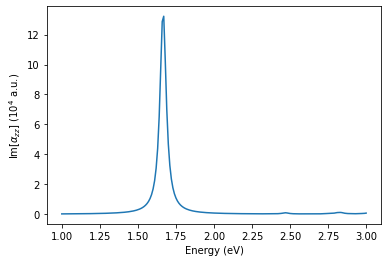

In [2]:
alpha_freq = np.loadtxt("Na515rod/wFQ_polarizability.out")

fig, ax = plt.subplots()
ax.plot(alpha_freq[:,0], alpha_freq[:,6]/1e4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel(r"Im[$\alpha_{zz}$] ($10^4$ a.u.)")

Text(0, 0.5, 'Induced Z Dipole (a.u.)')

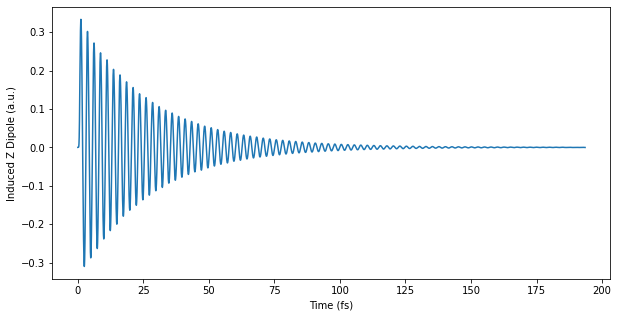

In [3]:
dipole_time = np.loadtxt("Na515rod/wFQ_time_propagation.out")

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dipole_time[:,1]* 2.41889e-2, dipole_time[:,4])
ax.set_xlabel("Time (fs)")
ax.set_ylabel("Induced Z Dipole (a.u.)")

In [4]:
# fft
au2eV = 27.2114

def fourier(val_t, N, t0, dt, w0=0, wf=15):
    w = fft.fftfreq(N, dt) * 2 * np.pi
    val_w = fft.fft(val_t)
    w = fft.fftshift(w)
    val_w = fft.fftshift(val_w)
    phase = dt * np.exp(-1j * w * t0)
    val_w *= phase
    dw = w[1] - w[0]
    i1 = int((-wf/au2eV - w[0])/dw)
    i2 = int((-w0/au2eV - w[0])/dw)
    w = np.flip(w[i1:i2])
    val_w = np.flip(val_w[i1:i2])
    w *= -1
    return val_w, w

t = dipole_time[:,1]
muz = dipole_time[:,4]
Ez = dipole_time[:,7]
N = t.shape[0]
t0 = t[0]
dt = t[1] - t[0]

Ez_w, w = fourier(Ez, N, t0, dt, w0=0.95, wf=3.05)
muz_w, _ = fourier(muz, N, t0, dt, w0=0.95, wf=3.05)

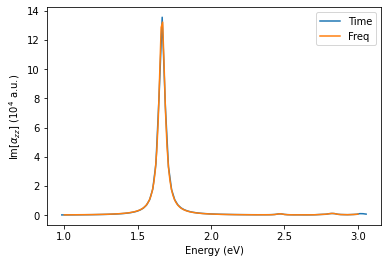

In [5]:
alpha_zz = np.divide(muz_w, Ez_w)
fig, ax = plt.subplots()
ax.plot(w*au2eV, np.imag(alpha_zz)/1e4, label="Time")
ax.plot(alpha_freq[:,0], alpha_freq[:,6]/1e4, label="Freq")
ax.set_xlabel("Energy (eV)")
ax.set_ylabel(r"Im[$\alpha_{zz}$] ($10^4$ a.u.)")
ax.legend()